In [1]:
import keras
keras.__version__

Using TensorFlow backend.
C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LG\Anaconda3\envs\tensorflow\lib

'2.2.4'

## 5.1 - 합성곱 신경망 소개
###### Python 3.5.5. keras 2.1.6에서 실행 확인하였습니다.



* 주로 이미지 분석에 사용되는 기법으로 특징간의 연관관계가 중요할떄 많이 사용된다


* FNN은 전역패턴을 학습하고 CNN은 지역패턴을 학습하게 된다. CNN이 주로 이미지 분석에 쓰이는 이유는 바로 이 부분이다. 이미지는 인접 픽셀과의 상관관계가 중요하기 때문에 벡터로 학습하는 FNN보다 데이터의 형상이 유지된 채로 학습하는 CNN이 결과가 더 좋다


* FNN
![image](https://user-images.githubusercontent.com/13353498/62863941-49334280-bd45-11e9-874f-0f06d8b1c490.png)


* CNN

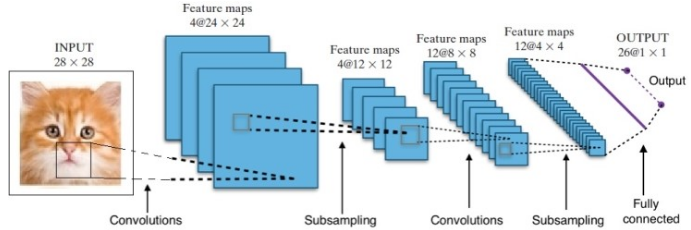

* CNN은 합성곱(conv)계층과 풀링 계층으로 구성된다


* CNN은 합성곱-활성함수-풀링-합성곱-활성함수-풀링 의 모습으로 구성된다


* 합성곱 계층은 데이터의 형상을 유지한다.


* 아래 코드에서는 활성 함수로 relu를 사용했고 합성곱-풀링-합성곱-풀링-합성곱 으로 구성된 모델로 학습했다


* 합성곱 계층은 Input Data - filter(kernel) - Output Data로 진행된다. 이 필터가 일정간격(stride)으로 이동하며 입력 데이터에 적용된다
이때 필터는 어떠한 특성이 데이터에 포함되어 있는지 확인하기 위해 사용된다
(동일 필터가 이미지 전체에 사용된다)


* 이때 학습 데이터는 (witdh, height, channel)크기의 입력텐서가 사용되는데 MNIST의 (28,28,1)이 그 예다



* 풀링은 2차원 데이터의 세로 및 가로 방향의 공간을 줄이는 방법이다. 풀링에는 최대 풀링(Max Pooling), 평균 풀링(Average Pooling) 등이 있다. 최대 풀링은 지정된 영역에서 최댓값을 구하는 방법이고, 평균 풀링은 지정 영역의 평균을 계산한다. 
(이미지 인식 분야에서는 주로 최대 풀링을 사용한다)

* Conv2D와 MaxPooling2D층의 출력은 (height, width, channels) 크기의 3D 텐서이다


* 높이와 너비 차원은 네트워크가 깊어질수록 작아지는 경향이 있다


* 마지막 Conv2D층을 보면 3,3,64의 형식으로 출력된다




* 10개의 클래스 분류를 위해 마지막 층의 출력 크기를 10으로 하고 softmax 활성화 함수를 사용한다

* softmax 함수 : 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.



In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

W0812 20:49:34.193667 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 20:49:34.245348 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 20:49:34.257061 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 20:49:34.304885 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

W0812 20:49:35.192719 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 20:49:35.233205 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 20:49:35.425468 39544 deprecation.py:323] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0812 20:49:35.618685 39544 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name

Epoch 1/5
60000/60000 [==============================] - 32s 539us/step - loss: 0.1678 - acc: 0.9473
Epoch 2/5
60000/60000 [==============================] - 29s 479us/step - loss: 0.0468 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 27s 443us/step - loss: 0.0325 - acc: 0.99030s - loss: 0.0326 - 
Epoch 4/5
60000/60000 [==============================] - 26s 436us/step - loss: 0.0251 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 27s 445us/step - loss: 0.0197 - acc: 0.9942


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 157us/step


0.9908